In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_mse, test_mse, train_r2, test_r2

In [ ]:

np.random.seed(42)
X_linear = np.random.rand(100, 3) * 10
y_linear = 3 * X_linear[:, 0] + 2 * X_linear[:, 1] - 1.5 * X_linear[:, 2] + np.random.randn(100) * 2  # Target with noise

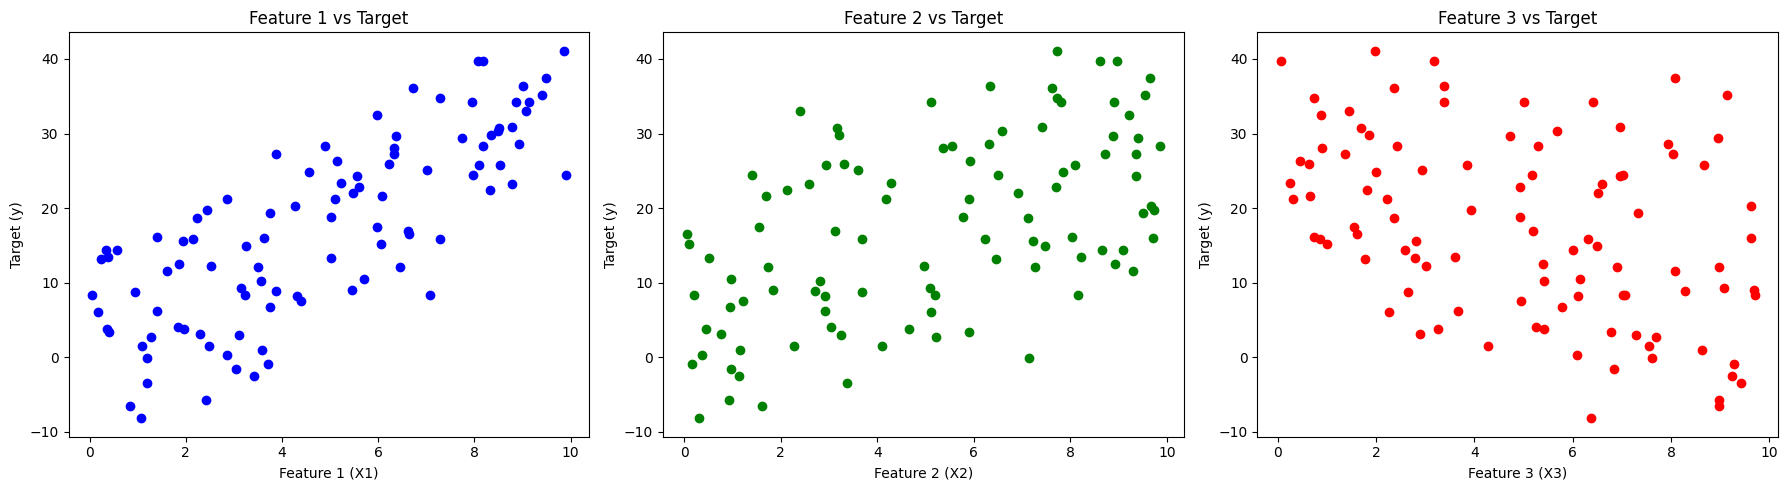

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_linear[:, 0], y_linear, c='b', label='Feature 1 vs Target')
axs[0].set_xlabel('Feature 1 (X1)')
axs[0].set_ylabel('Target (y)')
axs[0].set_title('Feature 1 vs Target')

axs[1].scatter(X_linear[:, 1], y_linear, c='g', label='Feature 2 vs Target')
axs[1].set_xlabel('Feature 2 (X2)')
axs[1].set_ylabel('Target (y)')
axs[1].set_title('Feature 2 vs Target')

axs[2].scatter(X_linear[:, 2], y_linear, c='r', label='Feature 3 vs Target')
axs[2].set_xlabel('Feature 3 (X3)')
axs[2].set_ylabel('Target (y)')
axs[2].set_title('Feature 3 vs Target')

plt.tight_layout()
plt.show()


In [ ]:
X_nonlinear = np.random.rand(100, 3) * 10
y_nonlinear = 5 * np.sin(X_nonlinear[:, 0]) + 2 * np.cos(X_nonlinear[:, 1]) + np.random.randn(100)  # Nonlinear target with noise

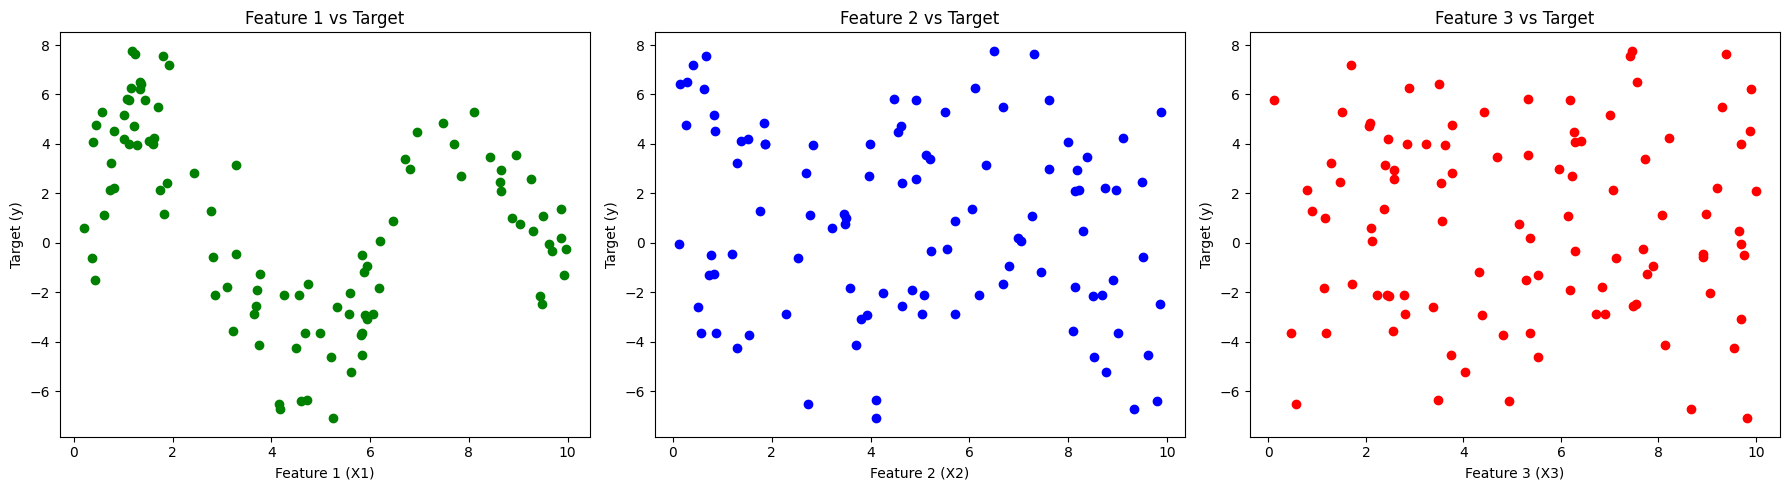

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_nonlinear[:, 0], y_nonlinear, color='green', label='Feature 1')
axs[0].set_xlabel('Feature 1 (X1)')
axs[0].set_ylabel('Target (y)')
axs[0].set_title('Feature 1 vs Target')

axs[1].scatter(X_nonlinear[:, 1], y_nonlinear, color='blue', label='Feature 2')
axs[1].set_xlabel('Feature 2 (X2)')
axs[1].set_ylabel('Target (y)')
axs[1].set_title('Feature 2 vs Target')

axs[2].scatter(X_nonlinear[:, 2], y_nonlinear, color='red', label='Feature 3')
axs[2].set_xlabel('Feature 3 (X3)')
axs[2].set_ylabel('Target (y)')
axs[2].set_title('Feature 3 vs Target')

plt.tight_layout()
plt.show()


In [ ]:

X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_non_train, X_non_test, y_non_train, y_non_test = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=3)
}

In [ ]:
results = {'Dataset': [], 'Model': [], 'Train MSE': [], 'Test MSE': [], 'Train R2': [], 'Test R2': []}

In [ ]:
for model_name, model in models.items():
    train_mse, test_mse, train_r2, test_r2 = evaluate_model(model, X_lin_train, X_lin_test, y_lin_train, y_lin_test)
    results['Dataset'].append('Linear')
    results['Model'].append(model_name)
    results['Train MSE'].append(train_mse)
    results['Test MSE'].append(test_mse)
    results['Train R2'].append(train_r2)
    results['Test R2'].append(test_r2)

In [ ]:
for model_name, model in models.items():
    train_mse, test_mse, train_r2, test_r2 = evaluate_model(model, X_non_train, X_non_test, y_non_train, y_non_test)
    results['Dataset'].append('Nonlinear')
    results['Model'].append(model_name)
    results['Train MSE'].append(train_mse)
    results['Test MSE'].append(test_mse)
    results['Train R2'].append(train_r2)
    results['Test R2'].append(test_r2)

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:

print(results_df)

     Dataset                    Model  Train MSE   Test MSE  Train R2  \
0     Linear        Linear Regression   2.801043   8.069570  0.980529   
1     Linear            KNN Regressor   6.832837  15.546422  0.952503   
2     Linear  Decision Tree Regressor  16.212111  54.148483  0.887304   
3  Nonlinear        Linear Regression  11.825832  17.572157  0.101241   
4  Nonlinear            KNN Regressor   4.740253  12.262165  0.639742   
5  Nonlinear  Decision Tree Regressor   2.171757   8.267479  0.834947   

    Test R2  
0  0.945107  
1  0.894246  
2  0.631658  
3 -0.230280  
4  0.141489  
5  0.421169  


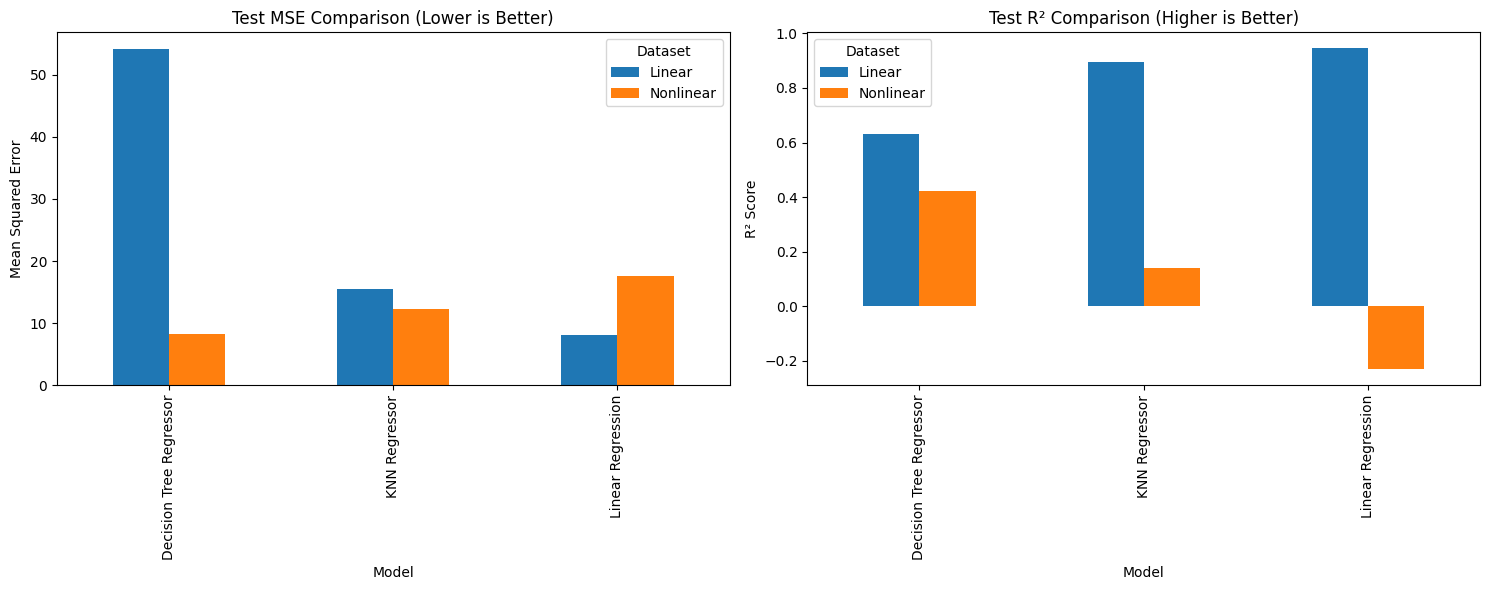

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df_mse = results_df.pivot(index='Model', columns='Dataset', values='Test MSE')
df_mse.plot(kind='bar', ax=axs[0])
axs[0].set_title('Test MSE Comparison (Lower is Better)')
axs[0].set_ylabel('Mean Squared Error')
axs[0].set_xlabel('Model')

df_r2 = results_df.pivot(index='Model', columns='Dataset', values='Test R2')
df_r2.plot(kind='bar', ax=axs[1])
axs[1].set_title('Test R² Comparison (Higher is Better)')
axs[1].set_ylabel('R² Score')
axs[1].set_xlabel('Model')

plt.tight_layout()
plt.show()